# **How Machine Learning Helps Farmers Select the Best Crops** (Predictive Modeling)

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called soil_measures.csv, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.

>In this project, you will apply **machine learning** to build a multi-class classification model `to predict the type of "crop"`, while using techniques to avoid multicollinearity, which is a concept where two or more features are highly correlated.

In [26]:
# All required libraries are imported here for you.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

In [27]:
# Load the dataset
url = "https://raw.githubusercontent.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/main/__Projects__/16_%20Predictive_Modeling_for_Agriculture/soil_measures.csv"
crops = pd.read_csv(url)
crops.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


In [28]:
n_rows, n_cols = crops.shape
print(f"number of rows = {n_rows}")
print(f"number of cols = {n_cols}")

number of rows = 2200
number of cols = 5


In [29]:
# Check for missing values
print("Missing values in each column:\n", crops.isna().sum())

Missing values in each column:
 N       0
P       0
K       0
ph      0
crop    0
dtype: int64


In [30]:
# Check how many crops we have, i.e., multi-class target
print("Unique crops in the dataset:\n", crops.crop.unique())

Unique crops in the dataset:
 ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


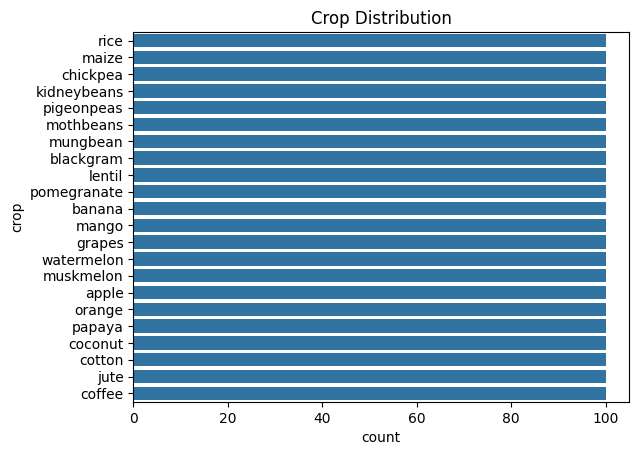

In [31]:
# EDA: Visualize the distribution of crops
sns.countplot(y='crop', data=crops)
plt.title('Crop Distribution')
plt.show()

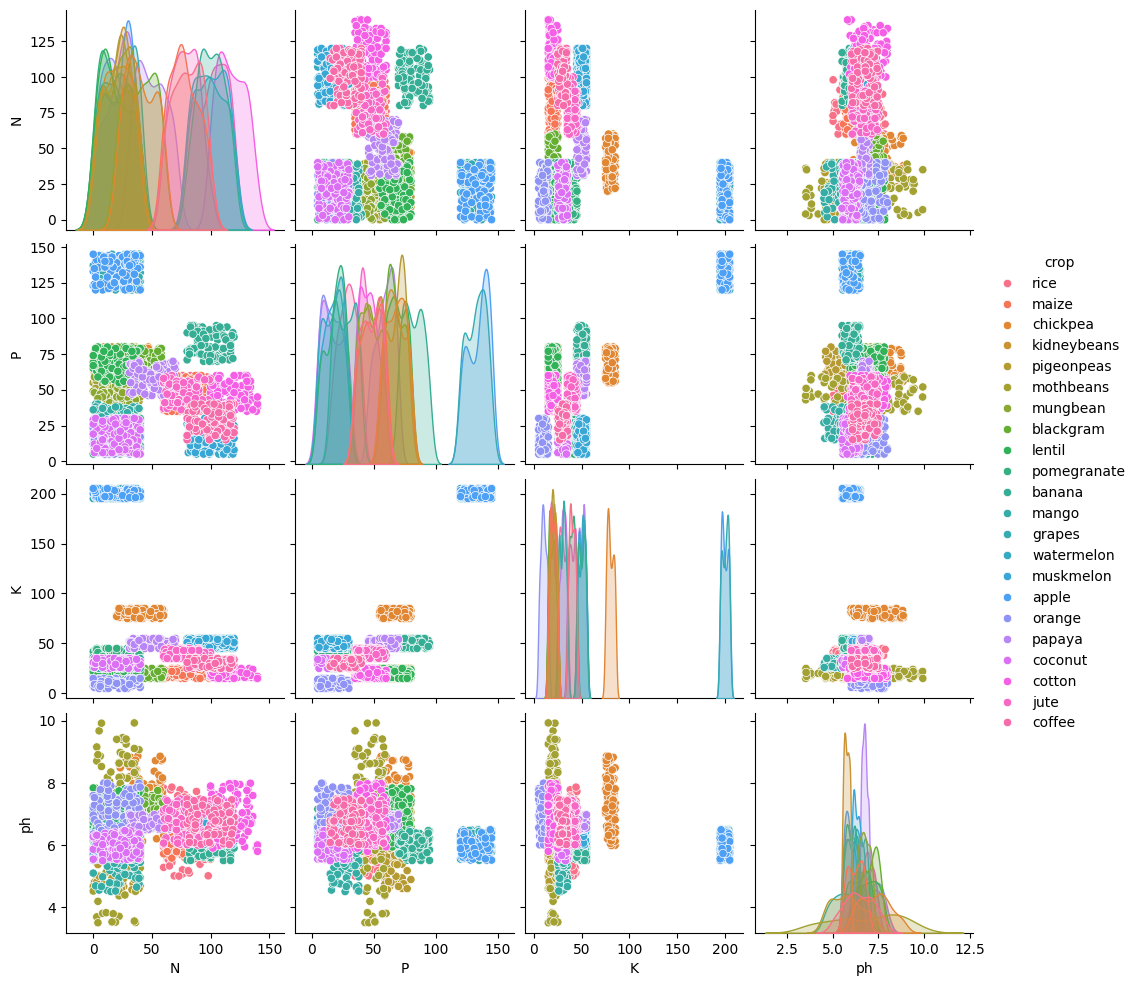

In [32]:
# EDA: Pairplot to visualize relationships between features
sns.pairplot(crops, hue='crop')
plt.show()

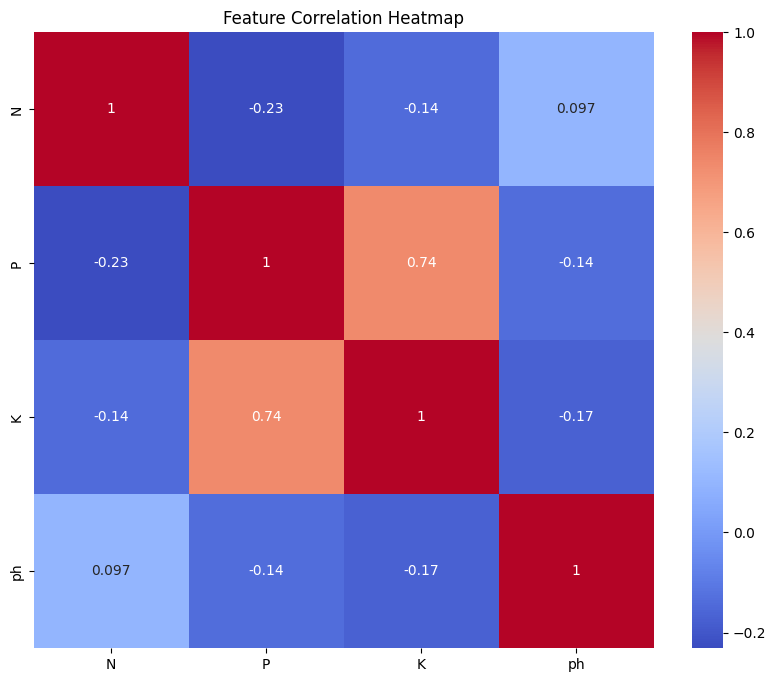

In [33]:
# Correlation heatmap (excluding the 'crop' column)
plt.figure(figsize=(10, 8))
sns.heatmap(crops.drop(columns='crop').corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [34]:
# Split into feature and target sets
X = crops.drop(columns="crop")
y = crops["crop"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Create a dictionary to store the model performance for each feature
feature_performance = {}

In [35]:
# Train a logistic regression model for each feature
for feature in ["N", "P", "K", "ph"]:
    log_reg = LogisticRegression(multi_class="multinomial", max_iter=1000)
    log_reg.fit(X_train_scaled[:, X.columns.get_loc(feature)].reshape(-1, 1), y_train)
    y_pred = log_reg.predict(X_test_scaled[:, X.columns.get_loc(feature)].reshape(-1, 1))

    # Calculate F1 score, the harmonic mean of precision and recall
    f1 = metrics.f1_score(y_test, y_pred, average="weighted")

    # Add feature-f1 score pairs to the dictionary
    feature_performance[feature] = f1
    print(f"F1-score for {feature}: {f1}")

F1-score for N: 0.10689900116508289
F1-score for P: 0.08426955444720076
F1-score for K: 0.13831456375684123
F1-score for ph: 0.045464856528065166


In [36]:
# K produced the best F1 score
# Store in best_predictive_feature dictionary
best_predictive_feature = {"K": feature_performance["K"]}
print("\nBest predictive feature:", best_predictive_feature)


Best predictive feature: {'K': 0.13831456375684123}


In [37]:
# Train a model using all features and evaluate performance
log_reg_full = LogisticRegression(multi_class="multinomial", max_iter=1000)
log_reg_full.fit(X_train_scaled, y_train)
y_pred_full = log_reg_full.predict(X_test_scaled)

In [38]:
# Evaluate the model
f1_full = metrics.f1_score(y_test, y_pred_full, average="weighted")
print(f"\nF1-score using all features: {f1_full}")


F1-score using all features: 0.6475209891596989


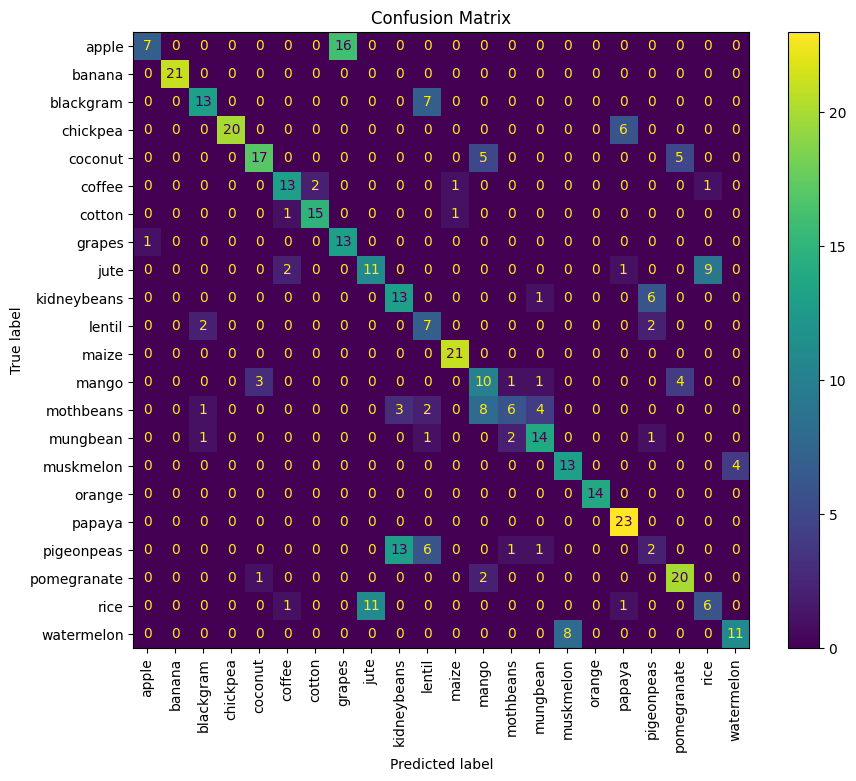

In [39]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_full)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg_full.classes_)

# Customize the plot to resemble your provided image
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(cmap='viridis', ax=ax)
plt.xticks(rotation=90)
plt.title('Confusion Matrix')
plt.show()

Let’s look at specific cells from our confusion matrix:

### Diagonal Elements (True Positives):
- For example, the cell at `(2,2)` which is `13`: This means `13` instances of 'blackgram' were correctly predicted as 'blackgram'.

### Off-diagonal Elements (False Positives and False Negatives):
- For example, the cell at `(0,8)` which is `16`: This means `16` instances of 'apple' were incorrectly predicted as `'grapes'`.

### Detailed Steps to Interpret:

#### Accuracy:
The overall accuracy can be calculated by dividing the sum of the diagonal elements (TP for all classes) by the total number of samples.

$$
\text{Accuracy} = \frac{\text{Sum of Diagonal Elements}}{\text{Total Number of Samples}}
$$

#### Precision for each class:
The ratio of correctly predicted instances of a class to the total instances predicted as that class (including FP).

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

#### Recall (Sensitivity) for each class:
The ratio of correctly predicted instances of a class to the total instances that actually belong to that class (including FN).

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

#### F1 Score for each class:
The harmonic mean of precision and recall.

$$
\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

### Example Calculation:
Let's calculate these metrics for one class, say 'blackgram'.

- **`True Positives (TP)`**: The diagonal element for 'blackgram' is 13.
- **`False Positives (FP)`**: The sum of the column corresponding to 'blackgram' excluding the diagonal (e.g., sum of the cells in column 2 minus the diagonal).
- **`False Negatives (FN)`**: The sum of the row corresponding to 'blackgram' excluding the diagonal (e.g., sum of the cells in row 2 minus the diagonal).


### **Visualizing Interpretation**

we can visualize these metrics using `heatmaps` or additional plots, which can further aid in interpreting the performance of the classifier.

              precision    recall  f1-score   support

       apple       0.88      0.30      0.45        23
      banana       1.00      1.00      1.00        21
   blackgram       0.76      0.65      0.70        20
    chickpea       1.00      0.77      0.87        26
     coconut       0.81      0.63      0.71        27
      coffee       0.76      0.76      0.76        17
      cotton       0.88      0.88      0.88        17
      grapes       0.45      0.93      0.60        14
        jute       0.50      0.48      0.49        23
 kidneybeans       0.45      0.65      0.53        20
      lentil       0.30      0.64      0.41        11
       maize       0.91      1.00      0.95        21
       mango       0.40      0.53      0.45        19
   mothbeans       0.60      0.25      0.35        24
    mungbean       0.67      0.74      0.70        19
   muskmelon       0.62      0.76      0.68        17
      orange       1.00      1.00      1.00        14
      papaya       0.74    

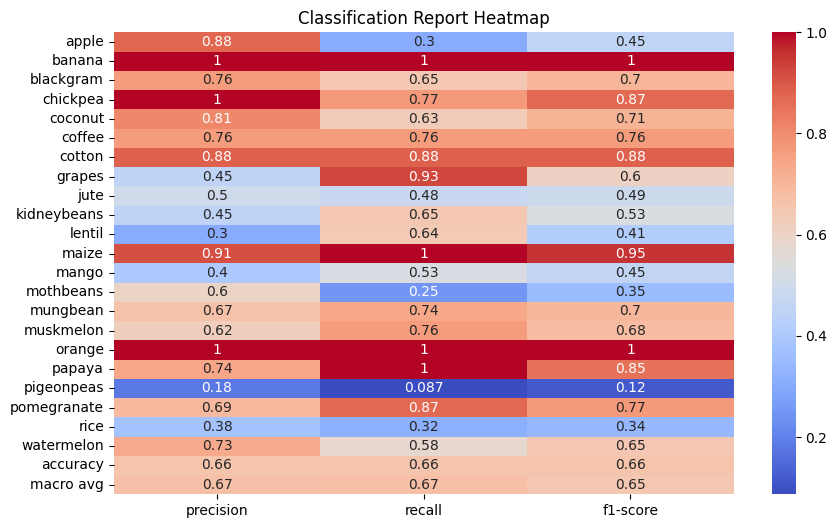

In [40]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred_full, target_names=log_reg_full.classes_)
print(report)

# Convert the classification report to a dictionary for further processing
report_dict = metrics.classification_report(y_test, y_pred_full, target_names=log_reg_full.classes_, output_dict=True)

# Convert to DataFrame for better visualization
report_df = pd.DataFrame(report_dict).transpose()

# Plotting the classification report
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='coolwarm')
plt.title('Classification Report Heatmap')
plt.show()

This code provides a detailed classification report and visualizes `precision`, `recall`, and `F1` score for each class, making it easier to interpret the performance.